In [4]:
import os
import sys
import optparse
from environment import environment
from sumolib import checkBinary  # Checks for the binary in environ vars
import traci
from agent import agents
import matplotlib.pyplot as plt 

In [5]:
if 'SUMO_HOME' in os.environ:
    tools = os.path.join(os.environ['SUMO_HOME'], 'tools')
    sys.path.append(tools)
    print('added SUMO_HOME to tools directory')
else:
    sys.exit("please declare environment variable 'SUMO_HOME'")

print(os.environ['SUMO_HOME'])

added SUMO_HOME to tools directory
C:\Program Files (x86)\Eclipse\Sumo\


In [12]:
sumoBinaryNoGui = checkBinary('sumo')
sumoBinary = checkBinary('sumo-gui')

nogui = [sumoBinaryNoGui, "-c", "test.sumocfg", '--no-warnings']
gui = [sumoBinary, "-c", "test.sumocfg", '--quit-on-end']

print(sumoBinaryNoGui)
print(type(sumoBinary))
print(sumoBinary)
print(os.environ['SUMO_HOME'])

C:\Program Files (x86)\Eclipse\Sumo\bin\sumo
<class 'str'>
C:\Program Files (x86)\Eclipse\Sumo\bin\sumo-gui
C:\Program Files (x86)\Eclipse\Sumo\


In [7]:
def default_run():
    traci.start(gui)
    step = 0
    env = environment()
    traci.trafficlight.setPhase('0', 0)
    action = [0]
    while traci.simulation.getMinExpectedNumber() > 0:
        traci.simulationStep()
        step += 1
    print('total waiting time of defaul cyclic traffic light', step)
    traci.close()

In [8]:
agent = None
env = None
# contains TraCI control loop
def run(episodes):
                             
    traci.start(nogui)
    env = environment()
    agent = agents(env.state_size(), env.action_size())
#     agent.load_policy('model.pt')
    traci.close()
    epsilon = 0.1
    ep = 0.
    while ep < episodes:
        ep+=1
        print(ep)
        epsilon = ep / (episodes + .1)

#         if (ep == episodes - 1):
#             traci.start(gui)
#         else: 
        traci.start(gui)
        step = 0
        prev = env.getState()
        reward = env.reward()
        action = agent.select_actions(1 , prev)
        print(action)
        print(epsilon)
        while traci.simulation.getMinExpectedNumber() > 0 and step < 5e3:
            traci.simulationStep()
            env.do_action(action)
            env.cumulateWaitingTime()
            if (step % 20 == 0):
                state = env.getState()
                reward = env.reward()
                print('reward:', reward)
                agent.add_memmory(prev, action, state, reward)
                action = agent.select_actions(epsilon , state)
                
            agent.train()
            step += 1
        print(len(agent.mem))      
        if (step >= 5e3-1):
            print('fail to complete the episode')
        print(step)
        traci.close()
        
    agent.save_policy('model.pt')
    sys.stdout.flush()
    agent.plot()

In [ ]:
default_run()

{'0': ['GGGGGgrrrrrrrrgGGGGgrrrrrrrGr', 'GGGGGgrrrrrrrrgGGGGgrrrrrrrrr', 'yyyyygrrrrrrrryyyyygrrrrrrrrr', 'rrrrrGrrrrrrrrrrrrrGrrrrrrrrr', 'rrrrryrrrrrrrrrrrrryrrrrrrrrr', 'rrrrrrGGGGGGGgrrrrrrgGGGGggrG', 'rrrrrrGGGGGGGgrrrrrrgGGGGggrr', 'rrrrrryyyyyyyyrrrrrryyyyyyyrr']}
{'0': {'31_2', '41_2', '11_1', '21_1', '41_1', '21_3', ':0_w2_0', '11_3', '21_2', '11_2', '11_0', '31_0', '31_3', '41_0', '21_4', '21_0', '41_3', '31_1', ':0_w1_0'}}
device available:  cpu
1.0
[[2]]
0.47619047619047616
reward: [[0.]]
reward: [[0.]]
reward: [[-0.001]]
reward: [[-0.049]]
reward: [[-0.155]]
reward: [[-0.208]]
reward: [[-0.36]]
reward: [[-0.624]]
reward: [[-0.878]]
reward: [[-1.119]]
reward: [[-1.325]]
reward: [[-1.609]]
reward: [[-0.238]]
reward: [[-1.182]]
reward: [[-0.728]]
reward: [[-1.396]]
reward: [[-1.216]]
reward: [[-2.126]]
reward: [[-2.607]]
reward: [[-0.592]]
reward: [[-1.593]]
reward: [[-1.938]]
reward: [[-2.862]]
reward: [[-0.177]]
reward: [[-1.005]]
reward: [[-1.831]]
reward: [[-1.618]]
rewar

C:\Users\Mr.Son\anaconda3\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([32, 32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


reward: [[-2.169]]
reward: [[-2.36]]
reward: [[-2.36]]
reward: [[-2.36]]
reward: [[-2.36]]
reward: [[-2.36]]
reward: [[-0.569]]
reward: [[-0.158]]
reward: [[-1.504]]
reward: [[-1.662]]
reward: [[-2.068]]
reward: [[-2.074]]
reward: [[-2.085]]
reward: [[-0.106]]
reward: [[-0.394]]
reward: [[-0.22]]
reward: [[-0.942]]
reward: [[-1.375]]
reward: [[-1.503]]
reward: [[-1.941]]
reward: [[-2.03]]
reward: [[-1.926]]
reward: [[-2.115]]
reward: [[-1.987]]
reward: [[-1.931]]
reward: [[-2.019]]
reward: [[-2.115]]
reward: [[-2.083]]
reward: [[-2.101]]
reward: [[-2.119]]
reward: [[-2.16]]
reward: [[-2.16]]
reward: [[-2.16]]
reward: [[-2.16]]
reward: [[-2.16]]
reward: [[-2.16]]
reward: [[-2.16]]
reward: [[-2.16]]
reward: [[-2.16]]
reward: [[-2.16]]
reward: [[-2.16]]
reward: [[-2.16]]
reward: [[-2.16]]
reward: [[-2.16]]
reward: [[-2.16]]
reward: [[-2.16]]
reward: [[-2.16]]
reward: [[-2.16]]
reward: [[-2.16]]
reward: [[-2.16]]
reward: [[-0.212]]
reward: [[-0.798]]
reward: [[-1.53]]
reward: [[-0.307]]
re

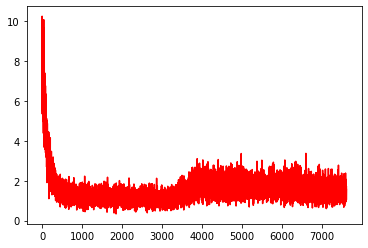

In [9]:
import traceback

try:
    run(episodes=2)
except Exception as e:
    traceback.print_exc()
    traci.close()


In [10]:
def demo():
    traci.start(gui)
    total_time = 0
    env = environment()
    agent = agents(env.state_size(), env.action_size())
    agent.load_policy('model.pt')
    step = 0
    prevPhase = 0
    action = [0]
    while traci.simulation.getMinExpectedNumber() > 0 and step < 5e3:
        traci.simulationStep()
        env.do_action(action)
        env.cumulateWaitingTime()
        step += 1
        if step % 100 == 0:
            state = env.getState()
            phase = env.getPhase()
            
            print('reward')
            print(env.reward())
            print('-------')
            print('state:')
            print(state)
            
            action = agent.select_actions(1 , state, True)
            print('action: ', action)
            env.do_action(action)
            

    if (step >= 5e3-1):
        print('fail to complete the episode')
    print('total waiting time of rl traffic light', step)
    traci.close()

In [11]:
demo()

{'0': ['GGGGGgrrrrrrrrgGGGGgrrrrrrrGr', 'GGGGGgrrrrrrrrgGGGGgrrrrrrrrr', 'yyyyygrrrrrrrryyyyygrrrrrrrrr', 'rrrrrGrrrrrrrrrrrrrGrrrrrrrrr', 'rrrrryrrrrrrrrrrrrryrrrrrrrrr', 'rrrrrrGGGGGGGgrrrrrrgGGGGggrG', 'rrrrrrGGGGGGGgrrrrrrgGGGGggrr', 'rrrrrryyyyyyyyrrrrrryyyyyyyrr']}
{'0': {'31_2', '41_2', '11_1', '21_1', '41_1', '21_3', ':0_w2_0', '11_3', '21_2', '11_2', '11_0', '31_0', '31_3', '41_0', '21_4', '21_0', '41_3', '31_1', ':0_w1_0'}}
device available:  cpu
action:  [0]
reward
[[-0.651]]
state:
[[0.02185697 0.         0.06026622 0.         0.0267037  0.
  0.         0.1734619  0.         0.05240541 0.1939     0.14513026
  0.07256513 0.08011109 0.04985702 0.13052039 0.08011109 0.08742787
  0.        ]]
tensor([[-3.7235, -0.7978, -2.6722, -2.3350, -1.4341, -1.1745, -0.6990, -2.5319]])
action:  [[6]]
reward
[[-2.151]]
state:
[[0.00699423 0.07316813 0.         0.07426161 0.14206366 0.
  0.         0.37935105 0.0281294  0.         0.13101353 0.06557091
  0.08359043 0.14206366 0.17777778 0.35

action:  [[0]]
reward
[[-22.2]]
state:
[[ 6.0062951e-01 -1.9448469e-16  3.9146841e-01  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  6.7550570e-01
   0.0000000e+00  4.4020543e-01  6.7760193e-01  6.6882324e-01
   6.7450601e-01  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  5.2981293e-01  0.0000000e+00]]
tensor([[ 0.6346, -0.4036, -3.7694, -2.1497, -3.7829, -5.3829, -3.1278,  0.0387]])
action:  [[0]]
reward
[[-22.2]]
state:
[[ 6.0062951e-01 -1.9448469e-16  3.9146841e-01  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  6.7550570e-01
   0.0000000e+00  4.4020543e-01  6.7760193e-01  6.6882324e-01
   6.7450601e-01  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  5.2981293e-01  0.0000000e+00]]
tensor([[ 0.6346, -0.4036, -3.7694, -2.1497, -3.7829, -5.3829, -3.1278,  0.0387]])
action:  [[0]]
reward
[[-22.2]]
state:
[[ 6.0062951e-01 -1.9448469e-16  3.9146841e-01  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  6.7550570e-01

action:  [[0]]
reward
[[-22.2]]
state:
[[ 6.0062951e-01 -1.9448469e-16  3.9146841e-01  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  6.7550570e-01
   0.0000000e+00  4.4020543e-01  6.7760193e-01  6.6882324e-01
   6.7450601e-01  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  5.2981293e-01  0.0000000e+00]]
tensor([[ 0.6346, -0.4036, -3.7694, -2.1497, -3.7829, -5.3829, -3.1278,  0.0387]])
action:  [[0]]
reward
[[-22.2]]
state:
[[ 6.0062951e-01 -1.9448469e-16  3.9146841e-01  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  6.7550570e-01
   0.0000000e+00  4.4020543e-01  6.7760193e-01  6.6882324e-01
   6.7450601e-01  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  5.2981293e-01  0.0000000e+00]]
tensor([[ 0.6346, -0.4036, -3.7694, -2.1497, -3.7829, -5.3829, -3.1278,  0.0387]])
action:  [[0]]
reward
[[-22.2]]
state:
[[ 6.0062951e-01 -1.9448469e-16  3.9146841e-01  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  6.7550570e-01